# Пакет Pandas
## Манипуляции над данными класса DataFrame, Series, Index

In [1]:
import numpy as np
import pandas as pd

### Объект Series

Объект **Series** библиотеки Pandas — одномерный массив индексированных данных. Его можно создать из списка или массива.

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

#### Явное описание индекса объекта Series

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                      index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

#### Объект Series как специализированный словарь
Series — структура, задающая соответствие *типизированных* ключей набору *типизированных* значений.

In [8]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Однако, в отличие от словаря, объект Series поддерживает характерные для массивов операции, такие как срезы:

In [10]:
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

#### Создание объектов Series

In [11]:
# pd.Series(data, index=index)
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [12]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [13]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

### Объект DataFrame
DataFrame можно рассматривать как упорядоченную последовательность выровненных объектов Series.  
Под «выровненными» имеется в виду то, что они используют один и тот же индекс.

In [14]:
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict)

In [15]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [16]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [17]:
states.columns

Index(['population', 'area'], dtype='object')

In [18]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Создание объектов DataFrame
1. Из одного объекта Series.

In [19]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


2. Из списка словарей.

In [20]:
data = [{'a': i, 'b': 2 * i}
             for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [21]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


3. Из словаря объектов Series. 

In [22]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


4. Из двумерного массива NumPy. 

In [24]:
pd.DataFrame(np.random.rand(3, 2),
                     columns=['foo', 'bar'],
                     index=['a', 'b', 'c'])

,foo,bar
a,0.544730,0.392735
b,0.803675,0.077660
c,0.364906,0.045013


5. Из структурированного массива NumPy.

In [25]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [26]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Объект Index
Объект Index можно рассматривать или как неизменяемый массив (immutable array), или как
упорядоченное множество (ordered set) (формально мультимножество, так как
объекты Index могут содержать повторяющиеся значения).

In [27]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [29]:
print("Имеет атрибуты массивов numpy: ", ind.size, ind.shape, ind.ndim, ind.dtype)

Имеет атрибуты массивов numpy:  5 (5,) 1 int64


In [31]:
print("Неизменямый массив")
try:
    ind[1] = 0
except TypeError:
    print("TypeError")

Неизменямый массив
TypeError


Неизменяемость делает безопаснее совместное использование индексов несколькими объектами DataFrame и массивами, исключая возможность побочных эффектов в виде случайной модификации индекса по неосторожности.  
#### Index как упорядоченное множество
Объект Index следует большинству соглашений, используемых встроенной структурой данных set языка Python.

In [35]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
# пересечение
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [36]:
# объединение
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [38]:
# симметричная разность
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

### Выборка данных из объекта Series

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                      index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [40]:
'a' in data

True

In [41]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [42]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [3]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Объект Series, основываясь на интерфейсе, напоминающем словарь, предоставляет возможность выборки элементов с помощью тех же базовых механизмов, что
и для массивов NumPy, то есть *срезов, маскирования и «прихотливой» индексации.* 

In [44]:
# срез посредством явного индекса
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [45]:
# срез посредством неявного целочисленного индекса
data[0:2]

a    0.25
b    0.50
dtype: float64

In [46]:
# маскирование
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [47]:
# «прихотливая» индексация
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Наибольшие затруднения среди них могут вызвать срезы. Обратите внимание,
что при выполнении среза с помощью *явного индекса* (data['a' : 'c']) значение,
соответствующее последнему индексу, *включается* в срез, а при срезе *неявным
индексом* (data[0:2]) — *не включается.*

#### Индексаторы: loc и iloc
Из-за потенциальной путаницы в случае целочисленных (явных и неявных) индексов в библиотеке Pandas предусмотрены специальные атрибуты-индексаторы, позволяющие явным образом применять определенные схемы индексации.  
  
Атрибут **loc** позволяет выполнить индексацию и срезы с использованием **явного** индекса.

In [5]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [6]:
data.loc[1]

'a'

In [7]:
data.loc[1:3]

1    a
3    b
dtype: object

Атрибут **iloc** дает возможность выполнить индексацию и срезы, применяя **неявный** индекс.

In [8]:
data.iloc[1]

'b'

In [9]:
data.iloc[1:3]

3    b
5    c
dtype: object

### Выборка данных из объекта DataFrame

In [11]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297, 
                  'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 
                 'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [12]:
data.area # вместо data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Хотя это и удобное сокращенное написание, не забывайте, что оно работает не всегда! Например, если имена столбцов — не строки или имена столбцов конфликтуют
с методами объекта DataFrame, доступ по именам атрибутов невозможен.

In [13]:
data.pop is data['pop']

False

In [14]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Объект DataFrame как двумерный массив

In [15]:
data.T # транспонирование

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [16]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [17]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [21]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


### Универсальные функции: сохранение индекса
В силу того что библиотека Pandas предназначена для работы с библиотекой
NumPy, все универсальные функции библиотеки NumPy будут работать с объектами Series и DataFrame библиотеки Pandas.  
Для унарных операций, например, изменения знака и тригонометрических функций, при использовании универсальных функций Pandas в выводе будут сохранены индекс и метки столбцов.

In [22]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [23]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [24]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                        columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [25]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### Универсальные функции: выравнивание индексов
При бинарных операциях над двумя объектами Series или DataFrame библиотека
Pandas будет выравнивать индексы в процессе выполнения операции. Удобно при работе с неполными данными.

In [26]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [29]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [30]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Если использование значений NaN нежелательно, можно заменить заполняющее
значение другим, воспользовавшись соответствующими методами объекта вместо операторов. Например, вызов метода A.add(B) эквивалентен вызову A + B, но предоставляет возможность по желанию задать явным образом значения заполнителей для любых потенциально отсутствующих элементов в объектах A или B:

In [31]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [32]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [33]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [34]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [35]:
A.stack() # выстраивание в один столбец

0  A     1
   B    11
1  A     5
   B     1
dtype: int32

In [36]:
fill = A.stack().mean()
A.add(B, fill_value=fill) # заполнение средним значением всех элементов объекта A

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


Соответствие между операторами языка Python и методами библиотеки Pandas
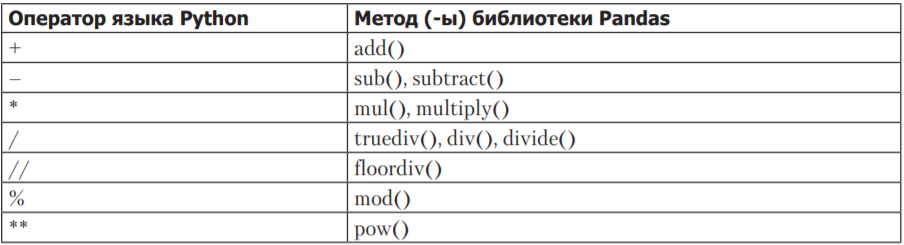

In [38]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [39]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


### Операции над пустыми значениями NaN, None
Библиотека Pandas рассматривает значения None и NaN как взаимозаменяемые средства указания на отсутствующие или пустые значения.  
Методы Pandas:
- isnull() — генерирует булеву маску для отсутствующих значений.
- notnull() — противоположность метода isnull().
- dropna() — возвращает отфильтрованный вариант данных.
- fillna() — возвращает копию данных, в которой пропущенные значения заполнены или восстановлены.

In [40]:
data = pd.Series([1, np.nan, 'hello', None])
data[data.notnull()]

0        1
2    hello
dtype: object

In [41]:
data.dropna()

0        1
2    hello
dtype: object

Но! Нельзя выбросить из DataFrame отдельные значения, только целые строки или столбцы.  
По умолчанию **dropna()** отбрасывает все строки, в которых присутствует хотя бы одно пустое значение.

In [42]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df.dropna()

,0,1,2
1,2.0,3.0,5


В качестве альтернативы можно отбрасывать NA-значения по разным осям: задание параметра axis=1 отбрасывает все столбцы, содержащие хотя бы одно пустое значение.

In [44]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


По умолчанию how='any', то есть отбрасываются все строки или столбцы (в зависимости от ключевого слова axis), содержащие хоть одно пустое значение. Можно
также указать значение how='all', при нем будут отбрасываться только строки/столбцы, все значения в которых пустые.

In [46]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [47]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Для более точного контроля можно задать с помощью параметра thresh минимальное количество непустых значений для строки/столбца, при котором он не отбрасывается.

In [49]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


В данном случае отбрасываются первая и последняя строки, поскольку в них содержится только по два непустых значения.

#### Заполнение пустых значений

In [50]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [51]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [52]:
# заполнение по направлению «вперед», копируя предыдущее значение в следующую ячейку
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [53]:
# заполнение по направлению «назад», копируя следующее значение в предыдущую ячейку
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

Для объектов DataFrame опции аналогичны, но в дополнение можно задать ось, по которой будет выполняться заполнение.  
Обратите внимание, что если при заполнении по направлению «вперед» предыдущего значения нет, то NA-значение остается незаполненным.